# Generate Synthetic data

In [336]:
import pandas as pd
import numpy as np
import random

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Name': ['Name' + str(i) for i in range(1, 5001)],
    'Age': np.random.randint(18, 60, 5000),
    'Gender': random.choices(['Male', 'Female'], k=5000),
    'Test 1': np.random.randint(60, 100, 5000),
    'Test 2': np.random.randint(60, 100, 5000),
    'Test 3': np.random.randint(60, 100, 5000),
    'Height': np.random.randint(150, 200, 5000),
    'Weight': np.random.randint(50, 100, 5000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Insert some missing values
for col in 'Test 1', 'Test 2', 'Test 3', 'Height', 'Weight':
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Save the DataFrame to a CSV file
df.to_csv('synthetic_data.csv', index=False)

print(df.head())


    Name  Age  Gender  Test 1  Test 2  Test 3  Height  Weight
0  Name1   56  Female     NaN    98.0    81.0     NaN    54.0
1  Name2   46  Female     NaN    91.0    98.0   185.0    51.0
2  Name3   32    Male    95.0    77.0    82.0   154.0    95.0
3  Name4   25    Male    94.0    76.0    89.0   188.0    73.0
4  Name5   38  Female    91.0    93.0     NaN   155.0    67.0


# Questions (1 marks each)

# Questions

Part - A

Question 1:
Load the synthetic data CSV file into a pandas DataFrame and display the first 10 rows of the DataFrame.

Question 2:
Check for any missing values in the DataFrame.

Question 3:
Fill the missing values in each column with the mean of that column.

Question 4:
Create a new column in the DataFrame called 'Average' which is the average of 'Test 1', 'Test 2', and 'Test 3' for each student.

Question 5:
Find the total number of Male and Female students.

Question 6:
Find the average age of Male and Female students.

Question 7:
Find the students with the top 10 highest average marks.

Question 8:
Create a histogram to visualize the distribution of the 'Average' marks.

Question 9:
Create a bar plot to visualize the number of Male and Female students.

Question 10:
Create a box plot to visualize the distribution of the 'Age' of the students.

Question 11:
Create a multivariate line plot to visualize the average scores of 'Test 1', 'Test 2', and 'Test 3' for males and females.

Question 12:
Save the updated DataFrame with the 'Average' column to a new CSV file.


Part - B

Question 13:
Convert the following lists into a single pandas DataFrame.

names = ['Alice', 'Bob', 'Charlie', 'David']
ages = [25, 30, 35, 40]


Question 14:
Create a list of squares of all even numbers between 1 and 20 using list comprehension.

Question 15:
Use a lambda function to create a list of odd numbers between 1 and 50.

Question 16:
Write a Python program to print a right angle triangle using "*"

# Question 1:
## Load the synthetic data CSV file into a pandas DataFrame and display the first 10 rows of the DataFrame.

In [337]:
data=pd.read_csv("synthetic_data.csv")

In [338]:
data.head()

,Name,Age,Gender,Test 1,Test 2,Test 3,Height,Weight
0,Name1,56,Female,NaN,98.0,81.0,NaN,54.0
1,Name2,46,Female,NaN,91.0,98.0,185.0,51.0
2,Name3,32,Male,95.0,77.0,82.0,154.0,95.0
3,Name4,25,Male,94.0,76.0,89.0,188.0,73.0
4,Name5,38,Female,91.0,93.0,NaN,155.0,67.0


# Question 2:
# Check for any missing values in the DataFrame.


In [339]:
data.isnull().sum()

Name        0
Age         0
Gender      0
Test 1    500
Test 2    500
Test 3    500
Height    500
Weight    500
dtype: int64

# Question 3:
# Fill the missing values in each column with the mean of that column.


In [340]:
data["Test 1"]=data["Test 1"].fillna(data["Test 1"].mean())
data["Test 2"]=data["Test 2"].fillna(data["Test 2"].mean())
data["Test 3"]=data["Test 3"].fillna(data["Test 3"].mean())
data["Height"]=data["Height"].fillna(data["Height"].mean())
data["Weight"]=data["Weight"].fillna(data["Weight"].mean())

In [341]:
data.isnull().sum()

Name      0
Age       0
Gender    0
Test 1    0
Test 2    0
Test 3    0
Height    0
Weight    0
dtype: int64

# Question 4:
## Create a new column in the DataFrame called 'Average' which is the average of 'Test 1', 'Test 2', and 'Test 3' for each student.


In [342]:
data["Average"]=(data["Test 1"].astype(int) + data["Test 2"].astype(int) + data["Test 3"].astype(int))/3

In [343]:
data["Average"]

0       86.000000
1       89.333333
2       84.666667
3       86.333333
4       87.666667
          ...    
4995    87.666667
4996    88.666667
4997    92.333333
4998    63.666667
4999    95.000000
Name: Average, Length: 5000, dtype: float64

In [344]:
data.head()

,Name,Age,Gender,Test 1,Test 2,Test 3,Height,Weight,Average
0,Name1,56,Female,79.33,98.0,81.000000,174.836889,54.0,86.000000
1,Name2,46,Female,79.33,91.0,98.000000,185.000000,51.0,89.333333
2,Name3,32,Male,95.00,77.0,82.000000,154.000000,95.0,84.666667
3,Name4,25,Male,94.00,76.0,89.000000,188.000000,73.0,86.333333
4,Name5,38,Female,91.00,93.0,79.104222,155.000000,67.0,87.666667


# Question 5:
## Find the total number of Male and Female students.


In [345]:
data["Gender"].value_counts()

Male      2511
Female    2489
Name: Gender, dtype: int64

# Question 6:
## Find the average age of Male and Female students.


In [346]:
data[["Gender","Age"]].groupby(data["Gender"]=="Female")


# Question 7: Find the students with the top 10 highest average marks.

In [347]:
data[["Name","Average"]].sort_values(by="Average",axis=0,ascending=False).iloc[0:10]

,Name,Average
4762,Name4763,98.000000
157,Name158,97.333333
3152,Name3153,97.333333
3636,Name3637,96.666667
371,Name372,96.666667
4105,Name4106,96.666667
1177,Name1178,96.666667
4540,Name4541,96.333333
745,Name746,96.333333
1235,Name1236,96.000000


# Question 8: Create a histogram to visualize the distribution of the 'Average' marks.

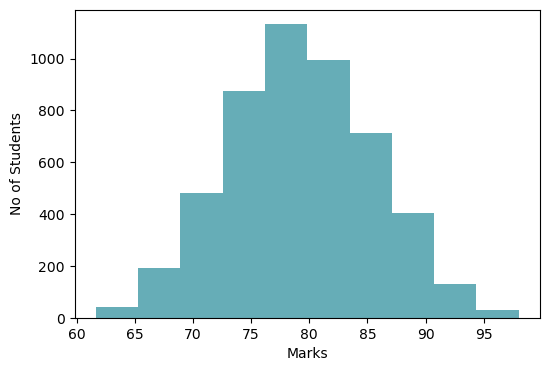

In [348]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(x=data["Average"],color="#0789")
plt.xlabel("Marks")
plt.ylabel("No of Students")
plt.show()

# Question 9:
## Create a bar plot to visualize the number of Male and Female students.


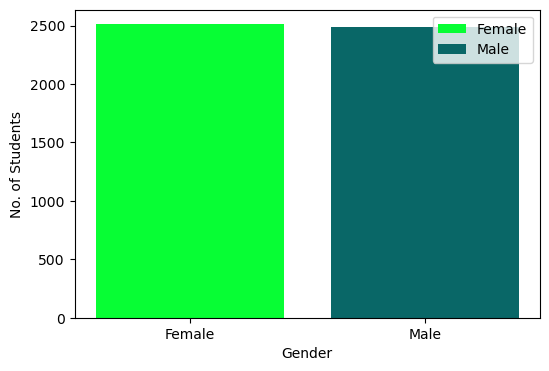

In [349]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(x=data["Gender"].unique(),height=data["Gender"].value_counts(),data=data,label=data["Gender"].unique(),color=["#07fe34","#096767"])
plt.legend()
plt.ylabel("No. of Students")
plt.xlabel("Gender")
plt.show()

# Question 10:
## Create a box plot to visualize the distribution of the 'Age' of the students.


In [350]:
import seaborn as sns

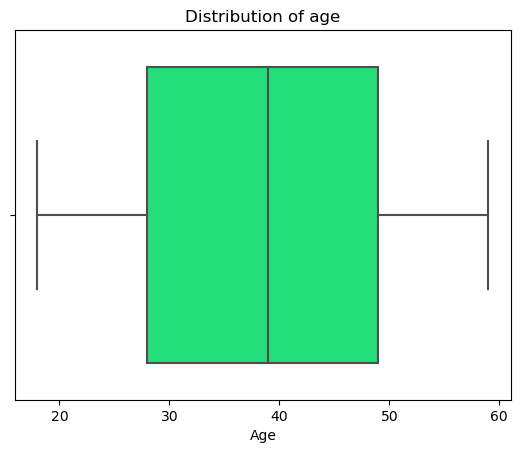

In [351]:
sns.boxplot(data=data,x=data["Age"],color="#05fe76")
plt.title("Distribution of age")
plt.show()

# Question 11:
## Create a multivariate line plot to visualize the average scores of 'Test 1', 'Test 2', and 'Test 3' for males and females.



# Question 12:
## Save the updated DataFrame with the 'Average' column to a new CSV file.



In [352]:
data.to_csv('new_synthetic.csv', index=False)

print(data.head())


    Name  Age  Gender  Test 1  Test 2     Test 3      Height  Weight  \
0  Name1   56  Female   79.33    98.0  81.000000  174.836889    54.0   
1  Name2   46  Female   79.33    91.0  98.000000  185.000000    51.0   
2  Name3   32    Male   95.00    77.0  82.000000  154.000000    95.0   
3  Name4   25    Male   94.00    76.0  89.000000  188.000000    73.0   
4  Name5   38  Female   91.00    93.0  79.104222  155.000000    67.0   

     Average  
0  86.000000  
1  89.333333  
2  84.666667  
3  86.333333  
4  87.666667  


# Question 13:
## Convert the following lists into a single pandas DataFrame.

names = ['Alice', 'Bob', 'Charlie', 'David']
ages = [25, 30, 35, 40]


In [353]:
data={"names":['Alice', 'Bob', 'Charlie', 'David'],"ages" : [25, 30, 35, 40]}

In [354]:
df=pd.DataFrame(data)

In [355]:
df

,names,ages
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40


# Question 14: Create a list of squares of all even numbers between 1 and 20 using list comprehension.

In [356]:
sqr=[ (x**2)  for x in range (2,21,2)]

In [357]:
sqr

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400]

# Question 15:
## Use a lambda function to create a list of odd numbers between 1 and 50.

In [358]:
odd=[lambda x:x%2==1  for x in range(1,51)]
odd

[<function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function

# Question 16:
## Write a Python program to print the following star pattern:


In [359]:
for i in range(1,6):
    print(i*"*")

*
**
***
****
*****
